In [1]:
import os
import random

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from modules.predict import predict
from helpers.plot import *
from modules.preprocessing.resize import resize_batch_images

config = Cfg.load_config_from_name('vgg_transformer')
config['cnn']['pretrained'] = False
config['device'] = 'cpu'
detector = Predictor(config)

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


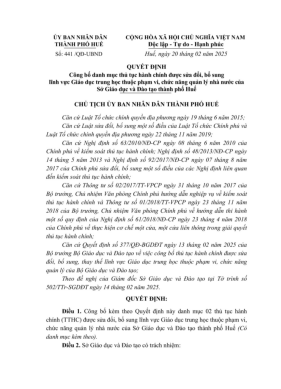

In [2]:
files = os.listdir("./data")
file = random.choice(files)
img = cv2.imread(f"./data/{file}")

display_img(img)

In [3]:
prediction, process_time = predict(
    file_path = os.path.join("./data", file),
    detector = detector
)

prediction

['119 (QĐ-UBND 17/02/2025 10:40:\n',
 'NỘI DUNG THỦ TỤC HÀNH CHÍNH ĐƯỢC SỬA ĐỔI,\nBỔ SUNG LĨNH VỰC KHÁM BỆNH CHỮA BỆNH THUOCT THẨM\nQUYỀN GIẢI QUYẾT CỦA Y TẾ TỈNH NINH\n',
 'THỦ TỤC HÀNH CHÍNH CẤP TỈNH\nTHỦ TỤC HÀNH CHÍNH SỬA ĐỔI, BỔ SUNG\nLĨNH VỰC KHÁM BỆNH, CHỮA BỆNH\n']

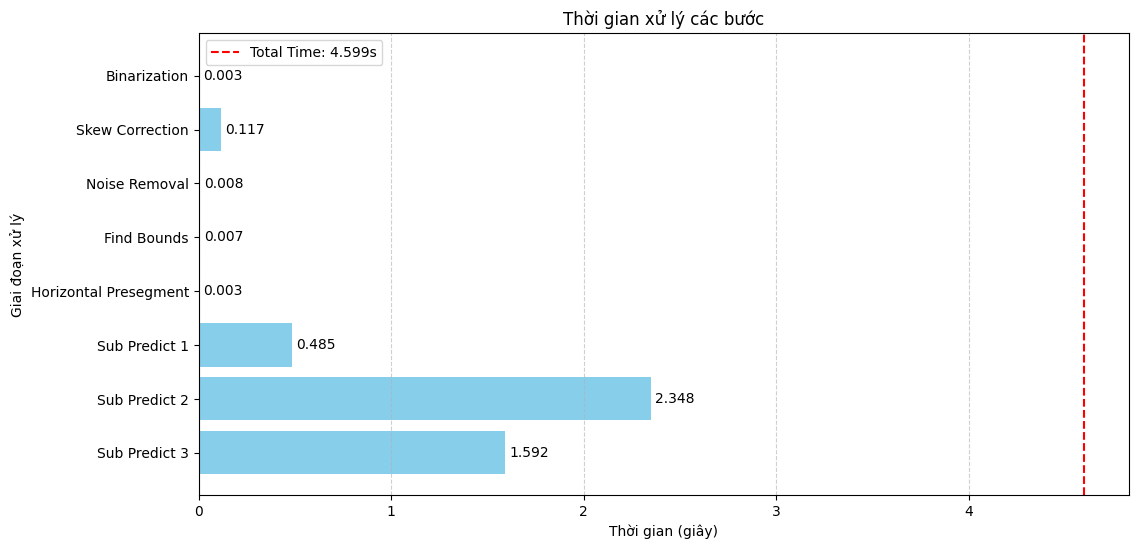

In [4]:
def visualize_time(data):
    # Lấy dữ liệu từ input
    preprocessing = data['preprocessing']['preprocessing_parts']
    prediction = data['predict_parts']
    
    # Gom nhóm các phần dữ liệu
    preprocessing_data = {
        'Binarization': preprocessing['binarization'],
        'Skew Correction': preprocessing['skew_correction'],
        'Noise Removal': preprocessing['noise_removal'],
        'Find Bounds': preprocessing['find_bounds'],
        'Horizontal Presegment': preprocessing['segmentation_total']
    }
    
    prediction_data = {
        f'Sub Predict {i+1}': time for i, time in enumerate(prediction['sub_predict'])
    }
    
    total_time = data['predict_total']
    
    # Chuẩn bị dữ liệu để vẽ
    labels = list(preprocessing_data.keys()) + list(prediction_data.keys())
    values = list(preprocessing_data.values()) + list(prediction_data.values())
    
    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color="skyblue")
    plt.axvline(total_time, color='red', linestyle='--', label=f'Total Time: {total_time:.3f}s')
    
    plt.xlabel("Thời gian (giây)")
    plt.ylabel("Giai đoạn xử lý")
    plt.title("Thời gian xử lý các bước")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    
    # Hiển thị giá trị trên thanh
    for index, value in enumerate(values):
        plt.text(value + 0.02, index, f"{value:.3f}", va="center")
    
    plt.show()

visualize_time(process_time)